# Vehicle Number Plate Analysis with Region of Interest

In [2]:
#Import necessary libraries
import cv2 as cv
import easyocr
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Load the image
plate=cv.imread("./images/plate_3.jpg")

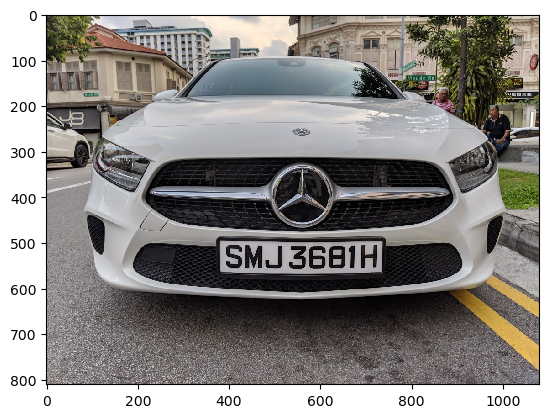

In [27]:
#Display loaded image
plt.imshow(cv.cvtColor(plate,cv.COLOR_BGR2RGB))

## Preprocessing Tasks

In [28]:
#Convert image into a single color channel image
gray_plate=cv.cvtColor(plate,cv.COLOR_BGR2GRAY)

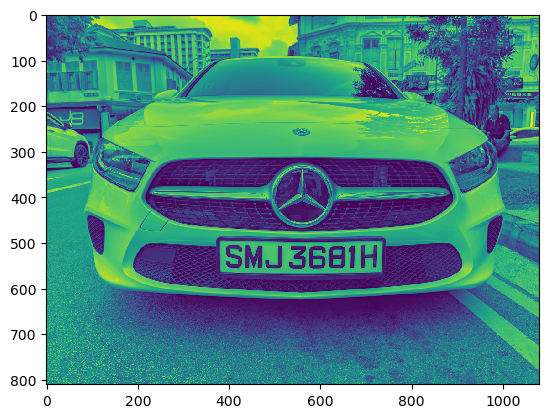

In [29]:
#Display grayscale image
plt.imshow(gray_plate)

In [30]:
#Apply Gaussian blur
blurred_plate=cv.GaussianBlur(gray_plate, (5, 5), 0)

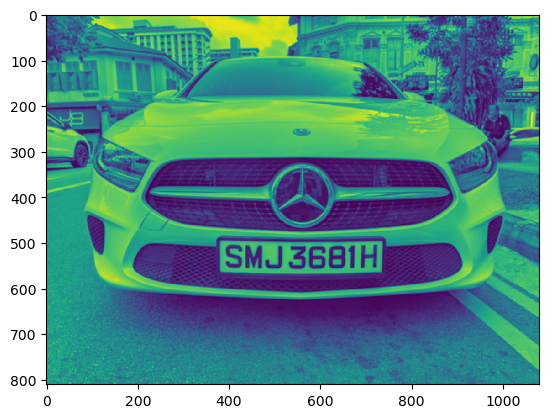

In [31]:
#Display blurred image
plt.imshow(blurred_plate)

In [40]:
#Perform edge detection
edge_plate=cv.Canny(blurred_plate, 75, 500)

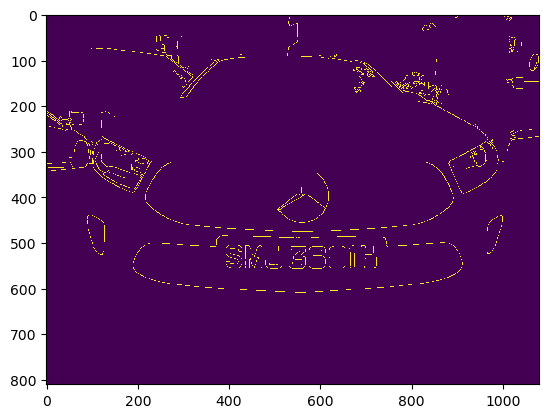

In [41]:
#Display edge detected image
plt.imshow(edge_plate)

In [42]:
#Find contours
contours, _ = cv.findContours(edge_plate, cv.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [43]:
#Initialize empty list to store contours
potential_plates = []

In [44]:
#Capture contours
for contour in contours:
        # get area of contour
        area = cv.contourArea(contour)
        
        # check whether the contour's area can be found within a certain range
        if 1000 < area < 50000:
            potential_plates.append(contour)

In [45]:
#Create a copy of original image
plate_copy=plate.copy()

In [46]:
#Draw contours on the copy
cv.drawContours(plate_copy,potential_plates,-1,(0, 0, 255),5)

array([[[ 56,  65,  69],
        [ 80,  89,  93],
        [ 76,  88,  90],
        ...,
        [196, 205, 215],
        [196, 205, 215],
        [195, 204, 214]],

       [[ 53,  64,  68],
        [ 58,  69,  73],
        [ 54,  67,  69],
        ...,
        [199, 208, 218],
        [199, 208, 218],
        [199, 208, 218]],

       [[ 43,  58,  60],
        [ 41,  56,  58],
        [ 37,  52,  54],
        ...,
        [200, 209, 218],
        [200, 209, 218],
        [199, 208, 217]],

       ...,

       [[152, 158, 165],
        [153, 159, 166],
        [122, 128, 133],
        ...,
        [126, 116, 116],
        [120, 110, 110],
        [112, 102, 102]],

       [[124, 130, 137],
        [122, 128, 135],
        [136, 139, 147],
        ...,
        [142, 132, 132],
        [126, 116, 116],
        [130, 120, 120]],

       [[132, 138, 145],
        [135, 141, 148],
        [144, 147, 155],
        ...,
        [130, 120, 120],
        [121, 111, 111],
        [130, 120, 120]]

Text(0.5,1,'Vehicle Number Plates Detected')

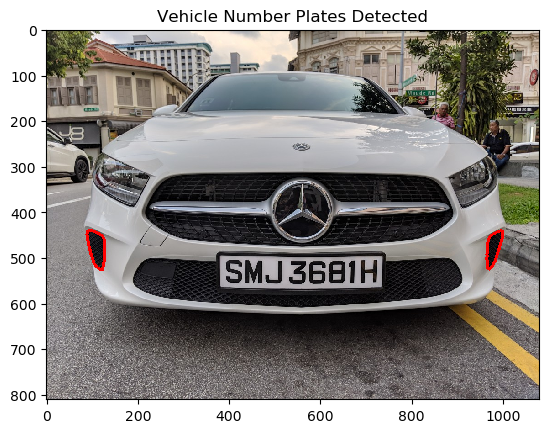

In [47]:
#Display image with contours
plt.imshow(cv.cvtColor(plate_copy, cv.COLOR_BGR2RGB))
plt.title("Vehicle Number Plates Detected")

In [76]:
def detect_plates():
    plate=cv.imread("./images/plate_1.jpg")
    gray_plate=cv.cvtColor(plate,cv.COLOR_BGR2GRAY)
    blurred_plate=cv.GaussianBlur(gray_plate, (5, 5), 0)
    edge_plate=cv.Canny(blurred_plate, 100, 200)
    contours, _ = cv.findContours(edge_plate, cv.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    potential_plates = []

    for contour in contours:
        # get area of contour
        area = cv.contourArea(contour)
        
        # check whether the contour's area can be found within a certain range
        if 1000 < area < 50000:
            potential_plates.append(contour)

    plate_copy=plate.copy()
    cv.drawContours(plate_copy,potential_plates,-1,(0, 0, 255),5)

    plt.imshow(cv.cvtColor(plate_copy, cv.COLOR_BGR2RGB))
    plt.title("Vehicle Number Plates Detected")

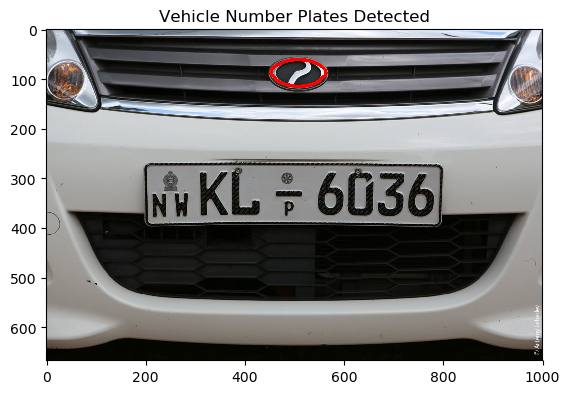

In [77]:
detect_plates()